<a href="https://colab.research.google.com/github/pauldclough/DeployMachineLearningModels/blob/master/Sentiment_roberta_prediction_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDI Survey Analysis 2023

## Sentiment analysis

In [ ]:
# Install the transformers library
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 81.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 107.7 MB/s eta 0:00:00


In [ ]:
# Import required packages
import torch
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer

# Create class for data preparation
class SimpleDataset:
    def __init__(self, tokenized_texts):
        self.tokenized_texts = tokenized_texts

    def __len__(self):
        return len(self.tokenized_texts["input_ids"])

    def __getitem__(self, idx):
        return {k: v[idx] for k, v in self.tokenized_texts.items()}

In [ ]:
# Load tokenizer and model, create trainer
model_name = "siebert/sentiment-roberta-large-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
trainer = Trainer(model=model)

In [ ]:
# Example: Import data from csv-file stored on Google Drive

from google.colab import drive
#drive.mount('/content/drive')


#file_name = "/content/drive/MyDrive/SurveyAnalysis/More_Included_Comments.csv"
#text_column = "More_Included"

file_name = "/content/drive/MyDrive/SurveyAnalysis/Anything_Else_Comments.csv"
text_column = "Anything_Else"

df_pred = pd.read_csv(file_name, encoding='cp1252')

# Remove linebreaks feom within the columns
df_pred = df_pred.replace(r'\r+|\n+|\t+','', regex=True)

#pred_texts = df_pred[text_column].dropna().astype('str').tolist()
pred_texts = df_pred[text_column].astype('str').tolist()

In [ ]:
pred_texts

['The culture and support at TPX is lightyears ahead of any other company I have worked at',
 'Design is shite, please change!!!!!!!! let our designers do it!',
 'I really like how TPXImpact is so diverse and inclusive a place to work, thank you.',
 "I know you're trying hard, but aspects of the culture and internal bureaucracy at TPXimpact are farcical, bordering on Kafkaesque. Largely this the legacy of Neal and Olly's hubris, but the constant change is becoming disorienting, especially when some of the changes are clearly detrimental to the way some of us perform our day to day responsibilities and the people making those decisions don't want to hear that because they've already made up their minds.",
 'No',
 'I would like to thank TPXimpact for allowing me to be me at work. I feel like I belong!',
 "I became a dual citizen recently and I often find (in other areas of life) that I need to choose my nationality as dual isn't really an option. Would be nice to hear thoughts on this.",

In [ ]:
# Tokenize texts and create prediction data set
tokenized_texts = tokenizer(pred_texts,truncation=True,padding=True)
pred_dataset = SimpleDataset(tokenized_texts)

In [ ]:
# Run predictions
predictions = trainer.predict(pred_dataset)

In [ ]:
# Transform predictions to labels
preds = predictions.predictions.argmax(-1)
labels = pd.Series(preds).map(model.config.id2label)
scores = (np.exp(predictions[0])/np.exp(predictions[0]).sum(-1,keepdims=True)).max(1)

In [ ]:
# Create DataFrame with texts, predictions, labels, and scores
df_labels = pd.DataFrame(list(zip(pred_texts,preds,labels,scores)), columns=['text','pred','label','score'])
df_labels.score = df_labels.score.round(3)

# Join with the demographics data again
df = pd.concat([df_pred, df_labels], axis = 1)
df

,Unnamed: 0,Job_Level,Division,Gender,Sexual_Orientation,Ethic_Group,Age_Band,Neurodivergent,Disabled,Anything_Else,text,pred,label,score
0,1,"Intermediate (Developer, Consultant, Delivery ...",Consulting,Female,Bisexual/ pansexual,Another ethnic group (includes any other ethni...,18-24,Yes,No,The culture and support at TPX is lightyears a...,The culture and support at TPX is lightyears a...,1,POSITIVE,0.999
1,2,"Leadership (Director, Lead, Head of...)",Digital Experience (DX),Prefer not to say,Prefer not to say,Prefer not to say,25-34,Prefer not to say,Prefer not to say,"Design is shite, please change!!!!!!!! let our...","Design is shite, please change!!!!!!!! let our...",0,NEGATIVE,0.999
2,3,"Intermediate (Developer, Consultant, Delivery ...",Data & Insights,Male,Heterosexual / Straight,Another ethnic group (includes any other ethni...,45-54,No,No,I really like how TPXImpact is so diverse and ...,I really like how TPXImpact is so diverse and ...,1,POSITIVE,0.999
3,4,"Intermediate (Developer, Consultant, Delivery ...",Digital Experience (DX),Male,Bisexual/ pansexual,White (includes any White background),35-44,Yes,Prefer not to say,"I know you're trying hard, but aspects of the ...","I know you're trying hard, but aspects of the ...",0,NEGATIVE,0.999
4,5,"C-suite (CEO, COO, CFO)",Digital Experience (DX),Male,Heterosexual / Straight,Another ethnic group (includes any other ethni...,45-54,No,No,No,No,0,NEGATIVE,0.998
5,6,"Intermediate (Developer, Consultant, Delivery ...",Business Enablement,Female,Heterosexual / Straight,White (includes any White background),45-54,No,No,I would like to thank TPXimpact for allowing m...,I would like to thank TPXimpact for allowing m...,1,POSITIVE,0.999
6,7,"Intermediate (Developer, Consultant, Delivery ...",Digital Experience (DX),Female,Heterosexual / Straight,White (includes any White background),35-44,No,No,I became a dual citizen recently and I often f...,I became a dual citizen recently and I often f...,1,POSITIVE,0.987
7,8,"Intermediate (Developer, Consultant, Delivery ...",Digital Experience (DX),Female,Heterosexual / Straight,White (includes any White background),35-44,No,No,Just wanted to add that I'm in the Pharma team...,Just wanted to add that I'm in the Pharma team...,1,POSITIVE,0.998
8,9,"Entry Level (Junior Consultant, Junior Develop...",Consulting,Male,Heterosexual / Straight,White (includes any White background),25-34,No,No,I think it might be useful to repeat this asse...,I think it might be useful to repeat this asse...,1,POSITIVE,0.986
9,10,"Leadership (Director, Lead, Head of...)",Business Enablement,Female,Heterosexual / Straight,Asian or Asian British (includes any Asian bac...,35-44,No,No,I'm new to TPXimpact and I believe the culture...,I'm new to TPXimpact and I believe the culture...,1,POSITIVE,0.999


In [ ]:
df.to_csv("/content/drive/MyDrive/SurveyAnalysis/Anything_Else_Sentiment.csv", header=True, sep=';')



## Topic modelling - BertTopic

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Install bertopic
!pip install bertopic

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 94.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 23.7 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp39-cp39-linux_x86_64.whl si

In [ ]:
!pip install numpy

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Data processing
import pandas as pd
import numpy as np

# Text preprocessiong
import nltk
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

# Topic model
from bertopic import BERTopic

# Dimension reduction
from umap import UMAP

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Remove stopwords
stopwords = nltk.corpus.stopwords.words('english')
print(f'There are {len(stopwords)} default stopwords. They are {stopwords}')

There are 179 default stopwords. They are ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'no

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Remove stopwords
df['text_without_stopwords'] = df['text'].apply(lambda x: ' '.join([w for w in x.split() if w.lower() not in stopwords]))

# Lemmatization
df['text_lemmatized'] = df['text_without_stopwords'].apply(lambda x: ' '.join([wn.lemmatize(w) for w in x.split() if w not in stopwords]))

# Take a look at the data
df.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,Job_Level,Division,Gender,Sexual_Orientation,Ethic_Group,Age_Band,Neurodivergent,Disabled,Anything_Else,text,pred,label,score,text_nopunc,text_without_stopwords,text_lemmatized,text_lemmatized_lower
0,1,"Intermediate (Developer, Consultant, Delivery ...",Consulting,Female,Bisexual/ pansexual,Another ethnic group (includes any other ethni...,18-24,Yes,No,The culture and support at TPX is lightyears a...,The culture and support at TPX is lightyears a...,1,POSITIVE,0.999,The culture and support at TPX is lightyears a...,culture support TPX lightyears ahead company w...,culture support TPX lightyears ahead company w...,culture support tpx lightyears ahead work
1,2,"Leadership (Director, Lead, Head of...)",Digital Experience (DX),Prefer not to say,Prefer not to say,Prefer not to say,25-34,Prefer not to say,Prefer not to say,"Design is shite, please change!!!!!!!! let our...","Design is shite, please change!!!!!!!! let our...",0,NEGATIVE,0.999,Design is shite please change let our designer...,"Design shite, please change!!!!!!!! let design...","Design shite, please change!!!!!!!! let design...",design shite please change let designer
2,3,"Intermediate (Developer, Consultant, Delivery ...",Data & Insights,Male,Heterosexual / Straight,Another ethnic group (includes any other ethni...,45-54,No,No,I really like how TPXImpact is so diverse and ...,I really like how TPXImpact is so diverse and ...,1,POSITIVE,0.999,I really like how TPXImpact is so diverse and ...,really like TPXImpact diverse inclusive place ...,really like TPXImpact diverse inclusive place ...,tpximpact diverse inclusive place work thank
3,4,"Intermediate (Developer, Consultant, Delivery ...",Digital Experience (DX),Male,Bisexual/ pansexual,White (includes any White background),35-44,Yes,Prefer not to say,"I know you're trying hard, but aspects of the ...","I know you're trying hard, but aspects of the ...",0,NEGATIVE,0.999,I know you're trying hard but aspects of the c...,"know trying hard, aspects culture internal bur...","know trying hard, aspect culture internal bure...",know try hard aspect culture internal bureaucr...
4,5,"C-suite (CEO, COO, CFO)",Digital Experience (DX),Male,Heterosexual / Straight,Another ethnic group (includes any other ethni...,45-54,No,No,No,No,0,NEGATIVE,0.998,No,,,


In [ ]:
# Step 2.1 - Extract embeddings (all-distilroberta-v1)
from sentence_transformers import SentenceTransformer

embedding_model = SentenceTransformer("all-distilroberta-v1") #  all-MiniLM-L6-v2

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Initiate UMAP
umap_model = UMAP(n_neighbors=2, # was 15
                  n_components=3,
                  min_dist=0,
                  metric='cosine',
                  random_state=100)

from bertopic import BERTopic

# Initiate BERTopic
#topic_model = BERTopic(nr_topics="auto", n_gram_range=(1,2), min_topic_size=5, top_n_words=10, umap_model=umap_model, language="english", calculate_probabilities=True)
topic_model = BERTopic(nr_topics="auto", n_gram_range=(1,2), min_topic_size=3, top_n_words=10, umap_model=umap_model, language="english", calculate_probabilities=True)

# Run BERTopic model
topics, probabilities = topic_model.fit_transform(df['text_lemmatized'])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
topic_model.get_topic_info()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Topic,Count,Name
0,-1,2,-1_worse_although_school_worse others
1,0,10,0_woman_family_diversity_would
2,1,9,1_na___
3,2,9,2_work_tpximpact_place work_like
4,3,7,3_feel_experience_like_time
5,4,7,4_neurodivergent_neurodiversity_people_think
6,5,5,5_no_good thanks_thanks no_you nothing
7,6,5,6_see_dual_this_pay


In [ ]:
topic_model.get_representative_docs(3)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



["One observation wonder something could helpful around supporting people come maternity leave. I've unusual situation I've come mat leave new job/company - I've reflecting whether people come back mat leave could buddy gone experience something? quite isolating experience get grip back workplace again. thought!",
 'Personally, feel like inclusion improved clear effort made address issue - doing, trying undo effect done past - TPX burned you, going feel included/part team trust voice opinion without negative impact.It potentially enough (now) give positive experience aimed first place expect undo previous negative experience correct cultural concerns; asking someone feel trust broken trust another time, quite big ask emotional perspective.',
 "appreciate work, know answer question, wonder realistic property truly inclusive publicly traded company. include many folk possible challenge take time effort OUTSIDE billable utilised time. Things feel slightly incongruous moment basically. Lik

In [ ]:
topic_model.get_topic(6)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[('see', 0.06449450677372807),
 ('dual', 0.05578727326509081),
 ('this', 0.05578727326509081),
 ('pay', 0.05578727326509081),
 ('question', 0.05573667368392452),
 ('think', 0.05412145737635395),
 ('often', 0.05104181968268556),
 ('great', 0.03969562676774442),
 ('option would', 0.03196850521817916),
 ('question around', 0.03196850521817916)]

In [ ]:
# Visualize top topic keywords
topic_model.visualize_barchart(top_n_topics=12)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Get the topic predictions
topic_prediction = topic_model.topics_[:]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Save the predictions in the dataframe
df['topic_prediction'] = topic_prediction

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
df.to_csv("/content/drive/MyDrive/SurveyAnalysis/Anything_Else_Sentiment_Topics.csv", header=True, sep=';')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## Topic Modelling - LDA (Gensim)

In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 72.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 105.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatibl

In [ ]:
import re
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from pprint import pprint
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from wordcloud import WordCloud
import spacy

# Text preprocessiong
import nltk
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
wn = nltk.WordNetLemmatizer()

pyLDAvis.enable_notebook()
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
# Remove stopwords
stopwords = nltk.corpus.stopwords.words('english')
print(f'There are {len(stopwords)} default stopwords. They are {stopwords}')

There are 179 default stopwords. They are ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'no

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Define functions

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

def remove_stopwords(texts, stop_words):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts, bigram_mod):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts, bigram_mod, trigram_mod):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, nlp, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
topicModellingCol = 'Anything_Else'

# Remove punctuation
df['text_nopunc'] = df[topicModellingCol].map(lambda x: re.sub('[,\\.!?]', '', x))

# Remove stopwords
stopwords.extend(['company', 'really', 'question', 'i\'ve', 'think', 'feel', 'would', 'like', 'could', 'great', 'see', '/',  'etc', '-', 'put', 'may', 'much', 'might', 'need', 'go', 'also']) # add words here that you want removed
df['text_without_stopwords'] = df['text_nopunc'].apply(lambda x: ' '.join([w for w in x.split() if w.lower() not in stopwords]))

# Lemmatization
df['text_lemmatized'] = df['text_without_stopwords'].apply(lambda x: ' '.join([wn.lemmatize(w, get_wordnet_pos(w)) for w in x.split() if w not in stopwords]))
## text = [nltk.stem.WordNetLemmatizer().lemmatize(token, pos='v') for token in text if len(token)>1]

#print( [(word, tag) for word, tag in tagged_comment if (tag=='NNP')


# Convert the titles to lowercase
df['text_lemmatized_lower'] = df['text_lemmatized'].map(lambda x: x.lower())


# Take a look at the data
df.head(2)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,Job_Level,Division,Gender,Sexual_Orientation,Ethic_Group,Age_Band,Neurodivergent,Disabled,Anything_Else,text,pred,label,score,text_nopunc,text_without_stopwords,text_lemmatized,text_lemmatized_lower
0,1,"Intermediate (Developer, Consultant, Delivery ...",Consulting,Female,Bisexual/ pansexual,Another ethnic group (includes any other ethni...,18-24,Yes,No,The culture and support at TPX is lightyears a...,The culture and support at TPX is lightyears a...,1,POSITIVE,0.999,The culture and support at TPX is lightyears a...,culture support TPX lightyears ahead worked,culture support TPX lightyears ahead work,culture support tpx lightyears ahead work
1,2,"Leadership (Director, Lead, Head of...)",Digital Experience (DX),Prefer not to say,Prefer not to say,Prefer not to say,25-34,Prefer not to say,Prefer not to say,"Design is shite, please change!!!!!!!! let our...","Design is shite, please change!!!!!!!! let our...",0,NEGATIVE,0.999,Design is shite please change let our designer...,Design shite please change let designers,Design shite please change let designer,design shite please change let designer


In [ ]:
# set variables
topicModellingCol = 'Anything_Else'
num_topics = [5, 10, 15, 20]

# Convert sentences in a table cell to list of words
data_text = df['text_lemmatized_lower'].drop_duplicates().values.tolist()
data_words = list(sent_to_words(data_text))

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words, bigram_mod)

# Form Trigrams
data_words_trigrams = make_trigrams(data_words, bigram_mod, trigram_mod)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
#Set parameters
num_topics = 8
num_words = 10

# Example documents
docs = data_text

# Tokenize the documents
tokenized_docs = [doc.lower().split() for doc in docs]

# Create a dictionary from the tokenized documents
dictionary = corpora.Dictionary(tokenized_docs)

# Convert the tokenized documents into a document-term matrix
doc_term_matrix = [dictionary.doc2bow(doc) for doc in tokenized_docs]

# Build the LDA model
lda_model = gensim.models.ldamodel.LdaModel(doc_term_matrix, num_topics=num_topics, id2word=dictionary, passes=20)

# Print the topics and their top words
for idx, topic in lda_model.print_topics(num_topics=num_topics, num_words=num_words):
    print("Topic {}:".format(idx))
    print(topic)

# Assign each document to a topic
doc_topics = [lda_model.get_document_topics(doc) for doc in doc_term_matrix]
for doc_idx, topics in enumerate(doc_topics):
    topic_idx, topic_prob = max(topics, key=lambda x: x[1])
    print("Document {} is assigned to topic {} with probability {}".format(doc_idx, topic_idx, topic_prob))


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Topic 0:
0.017*"people" + 0.017*"work" + 0.013*"make" + 0.013*"change" + 0.013*"tpx" + 0.013*"disadvantage" + 0.009*"d&i" + 0.009*"day" + 0.009*"recruiting" + 0.009*"know"
Topic 1:
0.027*"thank" + 0.019*"work" + 0.019*"diverse" + 0.019*"tpximpact" + 0.019*"question" + 0.010*"neurodiversity" + 0.010*"school" + 0.010*"change" + 0.010*"make" + 0.010*"please"
Topic 2:
0.020*"tpximpact" + 0.020*"talk" + 0.020*"new" + 0.020*"special" + 0.020*":)" + 0.011*"feel" + 0.011*"place" + 0.011*"good" + 0.011*"well" + 0.011*"people"
Topic 3:
0.026*"team" + 0.016*"member" + 0.011*"work" + 0.011*"national" + 0.011*"uk" + 0.011*"positive" + 0.011*"thing" + 0.011*"voice" + 0.011*"opinion" + 0.011*"issue"
Topic 4:
0.024*"woman" + 0.013*"inclusion" + 0.013*"diversity" + 0.013*"dual" + 0.013*"change" + 0.013*"often" + 0.013*"stats" + 0.013*"push" + 0.013*"already" + 0.013*"senior"
Topic 5:
0.017*"experience" + 0.013*"come" + 0.013*"leave" + 0.013*"support" + 0.013*"work" + 0.013*"trust" + 0.013*"time" + 0.00

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



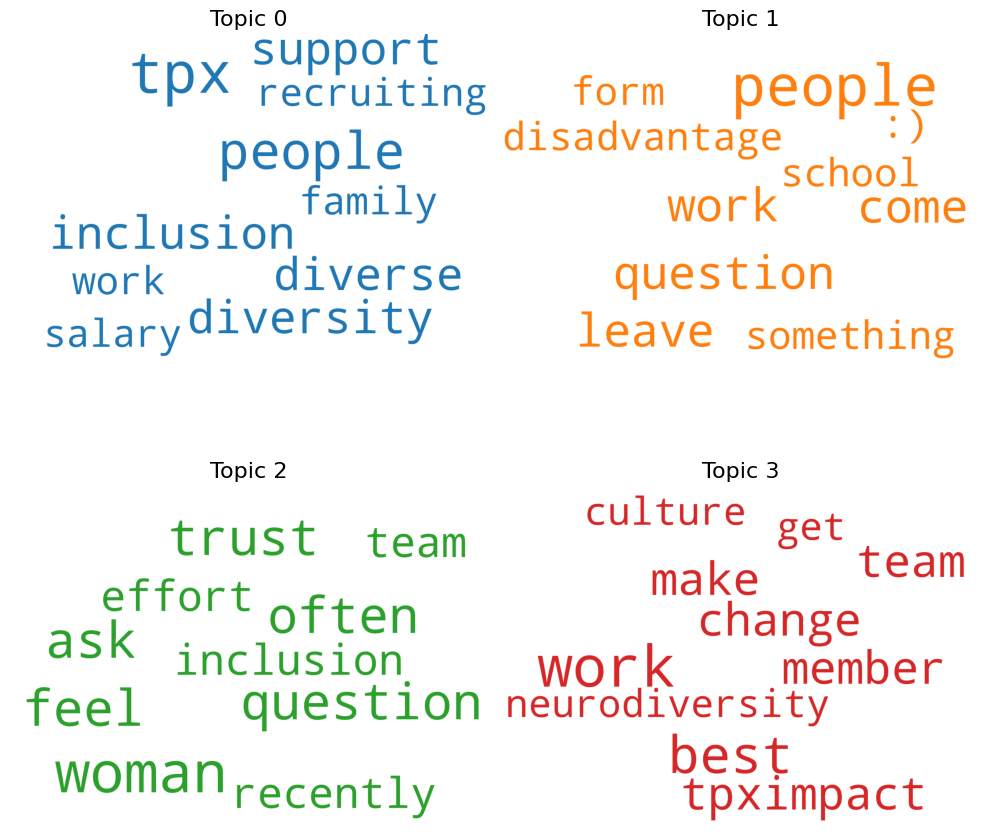

In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [ ]:
# https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/?utm_content=cmp-true

import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary=lda_model.id2word)
vis

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

ERROR:concurrent.futures:exception calling callback for <Future at 0x7fd910f31670 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py", line 391, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "/usr/lib/python3.9/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
ModuleNotFoundError: No module named 'pandas.core.indexes.numeric'
"""

The above exception was the direct cause of the following exception:

Traceback (most recen

BrokenProcessPool: ignored

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



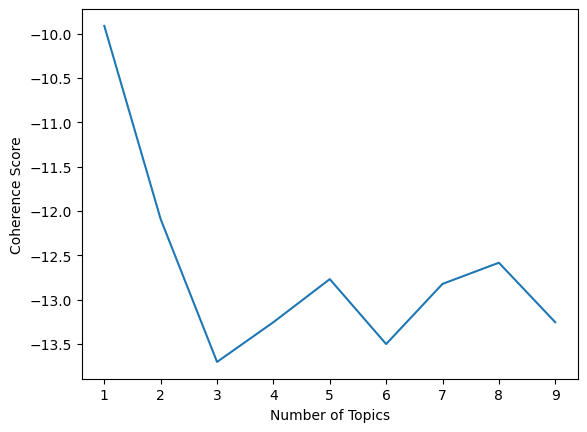

In [ ]:
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel

# Example documents
docs = data_text

# Tokenize the documents
tokenized_docs = [doc.lower().split() for doc in docs]

# Create a dictionary from the tokenized documents
dictionary = corpora.Dictionary(tokenized_docs)

# Convert the tokenized documents into a document-term matrix
doc_term_matrix = [dictionary.doc2bow(doc) for doc in tokenized_docs]

topics = []
score = []

for i in range(1,10,1):
   lda_model = LdaMulticore(corpus=doc_term_matrix, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
   cm = CoherenceModel(model=lda_model, corpus=doc_term_matrix, dictionary=dictionary, coherence='u_mass')
   topics.append(i)
   score.append(cm.get_coherence())
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

# Identify key phrases

In [ ]:
!pip install yake

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 24.3 MB/s eta 0:00:00


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


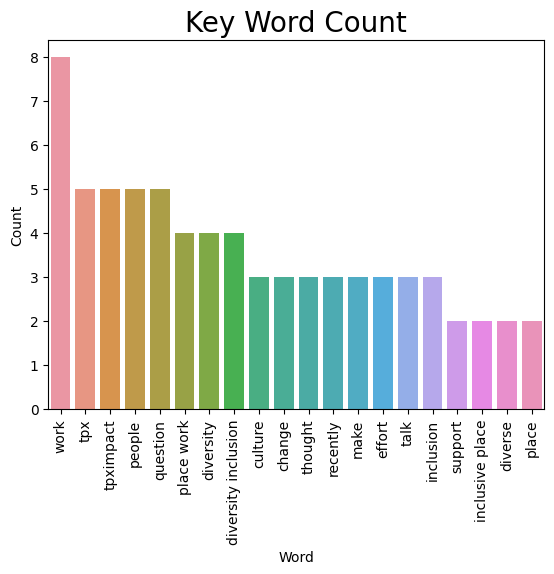

In [ ]:
# Import library
import yake
from collections import Counter
import seaborn as sns

# Instantiate (set n-word groupings hyperparameters to 2)
kw_extractor = yake.KeywordExtractor(n=2)

# Extract keywords and scores from each disclosure
keywords = df['text_lemmatized_lower'].apply(kw_extractor.extract_keywords)

# Extract scores from the YAKE output
text = []
for list in keywords:
    for component in list:
        text.append(str(component[0]))

# Bar plot - Create a dataframe of the most common 20 words
common_words = pd.DataFrame(Counter(text).most_common(20))
common_words.columns = ('Word', 'Count')
# Plot a bar chart of the most common 20 words
sns.barplot(x= common_words['Word'], y=common_words['Count'])
plt.xticks(rotation='vertical')
plt.title("Key Word Count", fontsize = 20)
plt.show()

In [ ]:
# https://pypi.org/project/pyspellchecker/

!pip install pyspellchecker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 45.9 MB/s eta 0:00:00


In [ ]:
from spellchecker import SpellChecker
import re

spell = SpellChecker()

#query = 'I am the begt spell cherken in ednbrugh caslte!'
query = 'Salisbury Strathpeffer washigtom'

# Remove punctuation from query string
query = re.sub(r'[^\w\s]', '', query)

# Split string into list
misspelled = query.split()
response = ""

# find those words that may be misspelled
#misspelled = spell.unknown(['ednbrugh', 'is', 'hapenning', 'heree', 'caslte'])

for word in misspelled:
    # Get the one `most likely` answer
    #print(spell.correction(word))

    # Check if initial letter of word is uppercase
    # Needed as spell.correction() converts words to lowercase
    if(word[0].isupper()):
      corrected = str(spell.correction(word))

      # Check if the spell correction returns None (if so use original string)
      if(corrected == "None"):
        corrected = word[0].upper() + word[1:]
      else:
        corrected = corrected[0].upper() + corrected[1:]

      response += corrected + " "
    else:
      response += spell.correction(word) + " "

    # Get a list of `likely` options
    #print(spell.candidates(word))

print("Your query: "+query)
print("Did you mean: "+response)

Your query: Salisbury Strathpeffer washigtom
Did you mean: Salisbury Strathpeffer washington 
